In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
import keras.backend as K
import os
import glob
import numpy as np
%matplotlib inline

In [2]:
def print_result(path):
    name_list = glob.glob(path)
    fig = plt.figure(figsize=(12, 16))
    for i in range(3):
        img = Image.open(name_list[i])
        sub_img = fig.add_subplot(131+i)
        sub_img.imshow(img)

In [3]:
img_path = "./data/PetImages/testing/cats/*"
in_path = "./data/PetImages/testing/"
out_path = "./data/PetImages/zengqiang/"
name_list = glob.glob(img_path)
name_list[:3]

['./data/PetImages/testing/cats\\100.jpg',
 './data/PetImages/testing/cats\\10000.jpg',
 './data/PetImages/testing/cats\\10010.jpg']

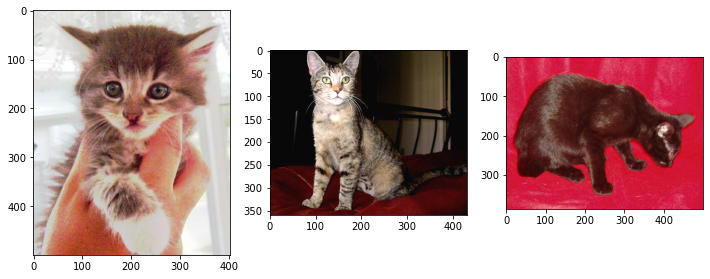

In [4]:
print_result(img_path)

# 指定target_size后所有图像都变为相同大小

In [5]:
datagen = image.ImageDataGenerator()
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False,
                                       save_to_dir=out_path+'resize', save_prefix='gen', target_size=(224, 224))

Found 2500 images belonging to 2 classes.


In [6]:
for i in range(3):
    gen_data.next()

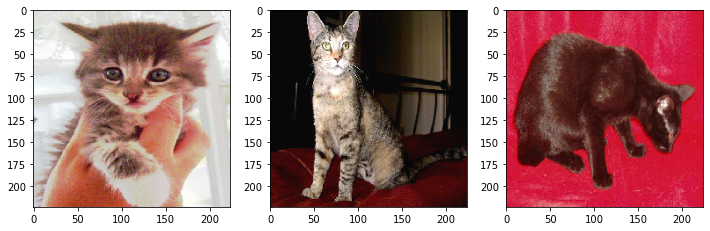

In [7]:
print_result(out_path + "resize/*")

# 角度转换

In [8]:
# 一般不需要旋转太大角度
datagen = image.ImageDataGenerator(rotation_range=45)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'rotation', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


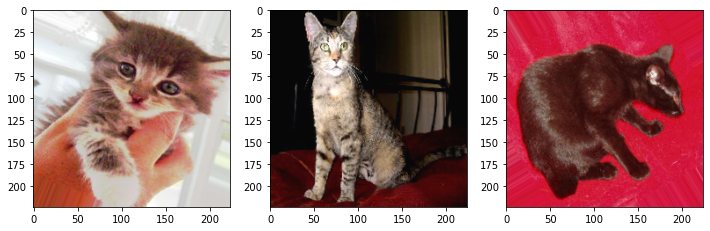

In [9]:
print_result(out_path + "rotation/*")

# 平移变换

In [10]:
datagen = image.ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.3)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'shift', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


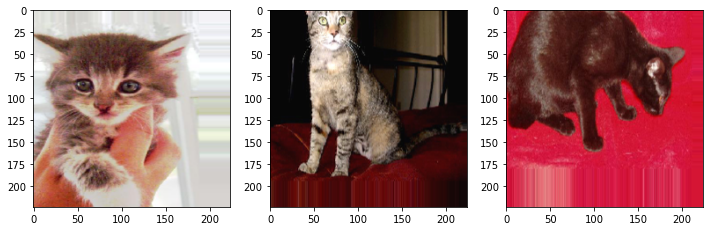

In [11]:
print_result(out_path + "shift/*")

In [12]:
datagen = image.ImageDataGenerator(width_shift_range=-0.3, height_shift_range=0.3)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'shift2', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


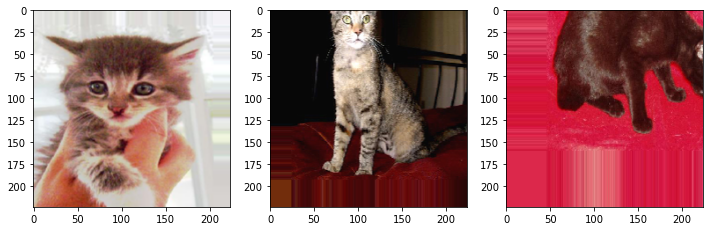

In [13]:
print_result(out_path + "shift2/*")

# 缩放

In [18]:
# 0-1放大，>1缩小
datagen = image.ImageDataGenerator(zoom_range=0.5)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'zoom'):
    os.makedirs(out_path+'zoom')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'zoom', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


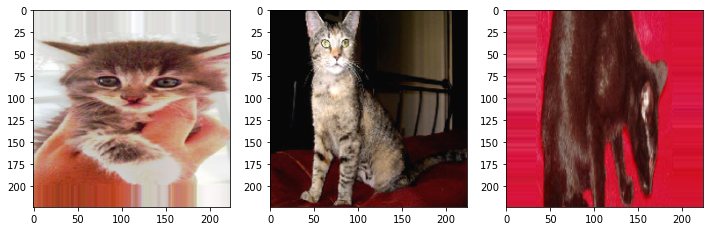

In [19]:
print_result(out_path + "zoom/*")

# channel_shift

In [20]:
# 像素值的平移
datagen = image.ImageDataGenerator(channel_shift_range=15)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'channel'):
    os.makedirs(out_path+'channel')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'channel', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


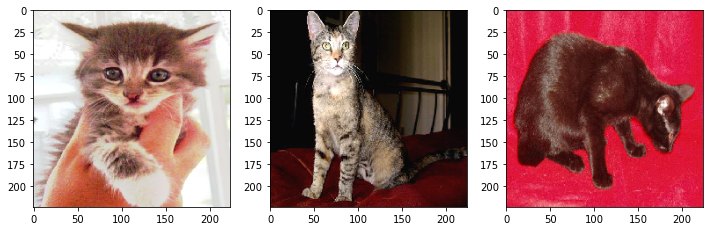

In [21]:
print_result(out_path + "channel/*")

# 翻转

In [22]:
# 水平、垂直翻转都可以
datagen = image.ImageDataGenerator(horizontal_flip=True)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'horizontal'):
    os.makedirs(out_path+'horizontal')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'horizontal', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


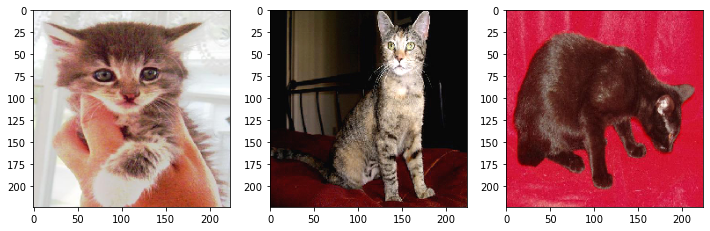

In [23]:
print_result(out_path + "horizontal/*")

In [24]:
# 水平、垂直翻转都可以
datagen = image.ImageDataGenerator(vertical_flip=True)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'vertical'):
    os.makedirs(out_path+'vertical')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'vertical', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


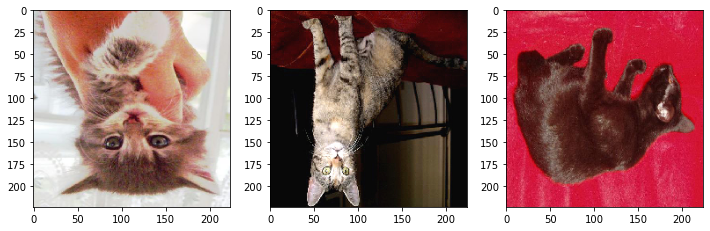

In [25]:
print_result(out_path + "vertical/*")

In [26]:
gen_data.next()

(array([[[[228., 222., 222.],
          [230., 224., 224.],
          [227., 221., 221.],
          ...,
          [226., 220., 222.],
          [225., 214., 218.],
          [226., 215., 219.]],
 
         [[227., 221., 221.],
          [228., 222., 222.],
          [226., 220., 220.],
          ...,
          [225., 219., 221.],
          [228., 217., 221.],
          [228., 217., 221.]],
 
         [[225., 219., 219.],
          [225., 219., 219.],
          [224., 218., 218.],
          ...,
          [224., 218., 220.],
          [228., 217., 221.],
          [228., 217., 221.]],
 
         ...,
 
         [[196., 168., 156.],
          [202., 174., 162.],
          [197., 169., 157.],
          ...,
          [ 50.,  50.,  48.],
          [ 52.,  51.,  49.],
          [ 54.,  53.,  51.]],
 
         [[186., 156., 145.],
          [191., 161., 150.],
          [186., 156., 145.],
          ...,
          [ 47.,  47.,  45.],
          [ 51.,  50.,  48.],
          [ 53.,  52.,  50.

rescale（归一化）

In [27]:
# 必用
datagen = image.ImageDataGenerator(rescale=1/255)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'rescale'):
    os.makedirs(out_path+'rescale')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'rescale', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


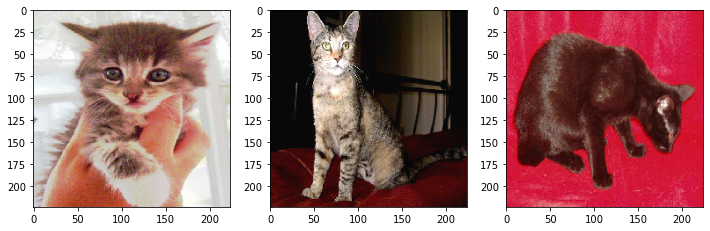

In [28]:
print_result(out_path + "rescale/*")

In [29]:
gen_data.next()

(array([[[[0.8941177 , 0.8705883 , 0.8705883 ],
          [0.90196085, 0.87843144, 0.87843144],
          [0.89019614, 0.86666673, 0.86666673],
          ...,
          [0.8862746 , 0.86274517, 0.8705883 ],
          [0.882353  , 0.83921576, 0.854902  ],
          [0.8862746 , 0.8431373 , 0.8588236 ]],
 
         [[0.89019614, 0.86666673, 0.86666673],
          [0.8941177 , 0.8705883 , 0.8705883 ],
          [0.8862746 , 0.86274517, 0.86274517],
          ...,
          [0.882353  , 0.8588236 , 0.86666673],
          [0.8941177 , 0.85098046, 0.86666673],
          [0.8941177 , 0.85098046, 0.86666673]],
 
         [[0.882353  , 0.8588236 , 0.8588236 ],
          [0.882353  , 0.8588236 , 0.8588236 ],
          [0.87843144, 0.854902  , 0.854902  ],
          ...,
          [0.87843144, 0.854902  , 0.86274517],
          [0.8941177 , 0.85098046, 0.86666673],
          [0.8941177 , 0.85098046, 0.86666673]],
 
         ...,
 
         [[0.7686275 , 0.65882355, 0.6117647 ],
          [0.79215

# 填充方法
constant:kkkkkkk|abcd|kkkkkkk(cval=k)  常数填充

nearest:aaaaaa|abcd|dddddd   最常用

reflect:abcddcba|abcd|dcbaabcd

wrap:abcdabcd|abcd|abcdabcd

In [32]:
datagen = image.ImageDataGenerator(fill_mode='wrap', zoom_range=[4, 4])
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'fill_mode'):
    os.makedirs(out_path+'fill_mode')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'fill_mode', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


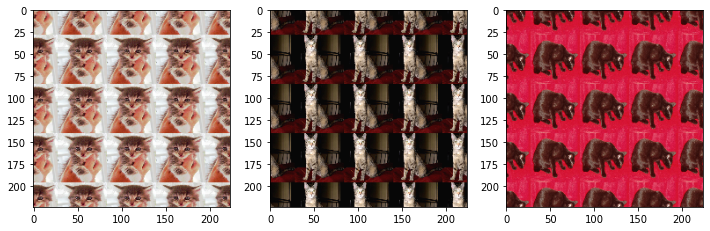

In [33]:
print_result(out_path + "fill_mode/*")

In [34]:
datagen = image.ImageDataGenerator(fill_mode='nearest', zoom_range=[4, 4])
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
print("**"*8)
datagen.fit(np_data)
if not os.path.exists(out_path+'fill_mode2'):
    os.makedirs(out_path+'fill_mode2')
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'fill_mode2', save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 2500 images belonging to 2 classes.
****************
Found 2500 images belonging to 2 classes.


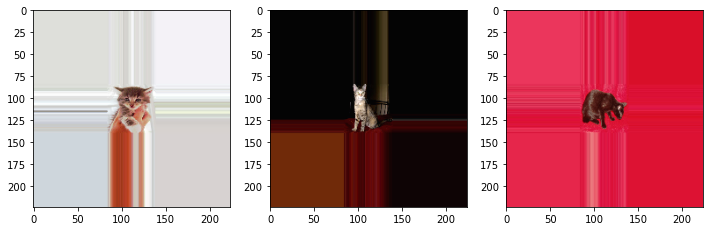

In [36]:
print_result(out_path + "fill_mode2/*")